In [23]:
import h5py
import resnet
import numpy as np
import pytest
from keras import backend as K
import keras_resnet
import matplotlib.pyplot as plt
data = h5py.File("project_datasets/A01T_slice.mat")

# Import data

In [2]:
labels = ["left","right","feet","tongue"]
A01T = h5py.File("project_datasets/A01T_slice.mat", 'r')
A02T = h5py.File("project_datasets/A02T_slice.mat", 'r')
A03T = h5py.File("project_datasets/A03T_slice.mat", 'r')
A04T = h5py.File("project_datasets/A04T_slice.mat", 'r')
A05T = h5py.File("project_datasets/A05T_slice.mat", 'r')
A06T = h5py.File("project_datasets/A06T_slice.mat", 'r')
A07T = h5py.File("project_datasets/A07T_slice.mat", 'r')
A08T = h5py.File("project_datasets/A08T_slice.mat", 'r')
A09T = h5py.File("project_datasets/A09T_slice.mat", 'r')
x1 = np.copy(A01T['image'])
y1 = np.copy(A01T['type'])
x2 = np.copy(A02T['image'])
y2 = np.copy(A02T['type'])
x3 = np.copy(A03T['image'])
y3 = np.copy(A03T['type'])
x4 = np.copy(A04T['image'])
y4 = np.copy(A04T['type'])
x5 = np.copy(A05T['image'])
y5 = np.copy(A05T['type'])
x6 = np.copy(A06T['image'])
y6 = np.copy(A06T['type'])
x7 = np.copy(A07T['image'])
y7 = np.copy(A07T['type'])
x8= np.copy(A08T['image'])
y8= np.copy(A08T['type'])
x9= np.copy(A09T['image'])
y9= np.copy(A09T['type'])

# Reshape data and get train-test split

In [3]:
def reshape(x,y):
    x_reshape = x[:,:22,:]
    y_reshape = y[0, 0:x1.shape[0]:1]
    return x_reshape, y_reshape
def get_train_test(X, y, num_test = 50, num_train = 238, num_val = 50, 
                   subtract_mean=True):
    mask = list(range(num_train))
    X_train = X[mask]
    y_train = y[mask]
    mask = list(range(num_val))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_train,num_train+num_test))
    X_test = X[mask]
    y_test = y[mask]
    return  X_train, y_train, X_test, y_test
def one_hot(y):
    y=y-769
    y = y.reshape(len(y))
    n_values = int(np.max(y)) + 1
    return np.eye(n_values)[np.array(y, dtype=np.int32)] 
def elm_non(x):
    where_are_NaNs = np.isnan(x)
    x[where_are_NaNs] = 0
    return x

In [4]:
x1_reshape,y1_reshape = reshape(x1,y1)
x2_reshape,y2_reshape = reshape(x2,y2)
x3_reshape,y3_reshape = reshape(x3,y3)
x4_reshape,y4_reshape = reshape(x4,y4)
x5_reshape,y5_reshape = reshape(x5,y5)
x6_reshape,y6_reshape = reshape(x6,y6)
x7_reshape,y7_reshape = reshape(x7,y7)
x8_reshape,y8_reshape = reshape(x8,y8)
x9_reshape,y9_reshape = reshape(x9,y9)
x1_reshape==elm_non(x1_reshape)
x2_reshape=elm_non(x2_reshape)
x3_reshape=elm_non(x3_reshape)
x4_reshape=elm_non(x4_reshape)
x5_reshape=elm_non(x5_reshape)
x6_reshape=elm_non(x6_reshape)
x7_reshape=elm_non(x7_reshape)
x8_reshape=elm_non(x8_reshape)
x9_reshape=elm_non(x9_reshape)
x1_train, y1_train, x1_test, y1_test = get_train_test(x1_reshape,y1_reshape)
x2_train, y2_train, x2_test, y2_test = get_train_test(x2_reshape,y2_reshape)
x3_train, y3_train, x3_test, y3_test = get_train_test(x3_reshape,y3_reshape)
x4_train, y4_train, x4_test, y4_test = get_train_test(x4_reshape,y4_reshape)
x5_train, y5_train, x5_test, y5_test = get_train_test(x5_reshape,y5_reshape )
x6_train, y6_train, x6_test, y6_test = get_train_test(x6_reshape,y6_reshape)
x7_train, y7_train, x7_test, y7_test = get_train_test(x7_reshape,y7_reshape)
x8_train, y8_train, x8_test, y8_test = get_train_test(x8_reshape,y8_reshape)
x9_train, y9_train, x9_test, y9_test = get_train_test(x9_reshape,y9_reshape)
elm_non(x1_train)
print(x1_reshape.shape)
print(y1_reshape.shape)
print(x1_train.shape)
print(y1_train.shape)
print(x1_test.shape)
print(y1_test.shape)

(288, 22, 1000)
(288,)
(238, 22, 1000)
(238,)
(50, 22, 1000)
(50,)


In [117]:
x_train=np.concatenate((x1_train,x2_train,x3_train,x4_train,x5_train,x6_train,x7_train,x8_train,x9_train), axis=0)
y_train=np.concatenate((y1_train,y2_train,y3_train,y4_train,y5_train,y6_train,y7_train,y8_train,y9_train), axis=0)
x_test=np.concatenate((x1_test,x2_train,x3_test,x4_test,x5_test,x6_test,x7_test,x8_test,x9_test), axis=0)
y_test=np.concatenate((y1_test,y2_train,y3_test,y4_test,y5_test,y6_test,y7_test,y8_test,y9_test), axis=0)

print(x_train.shape)
print(y_train.shape)

(2142, 22, 1000)
(2142,)


In [118]:
x_train_add = np.expand_dims(x_train, axis=0).transpose(1,0,2,3)
x1_train_add = np.expand_dims(x1_train, axis=0).transpose(1,0,2,3)
x2_train_add = np.expand_dims(x2_train, axis=0).transpose(1,0,2,3)
x3_train_add = np.expand_dims(x3_train, axis=0).transpose(1,0,2,3)
x4_train_add = np.expand_dims(x4_train, axis=0).transpose(1,0,2,3)
x5_train_add = np.expand_dims(x5_train, axis=0).transpose(1,0,2,3)
x6_train_add = np.expand_dims(x6_train, axis=0).transpose(1,0,2,3)
x7_train_add = np.expand_dims(x7_train, axis=0).transpose(1,0,2,3)
x8_train_add = np.expand_dims(x8_train, axis=0).transpose(1,0,2,3)
x9_train_add = np.expand_dims(x9_train, axis=0).transpose(1,0,2,3)

x_test_add = np.expand_dims(x_test, axis=0).transpose(1,0,2,3)
x1_test_add = np.expand_dims(x1_test, axis=0).transpose(1,0,2,3)
x2_test_add = np.expand_dims(x2_test, axis=0).transpose(1,0,2,3)
x3_test_add = np.expand_dims(x3_test, axis=0).transpose(1,0,2,3)
x4_test_add = np.expand_dims(x4_test, axis=0).transpose(1,0,2,3)
x5_test_add = np.expand_dims(x5_test, axis=0).transpose(1,0,2,3)
x6_test_add = np.expand_dims(x6_test, axis=0).transpose(1,0,2,3)
x7_test_add = np.expand_dims(x7_test, axis=0).transpose(1,0,2,3)
x8_test_add = np.expand_dims(x8_test, axis=0).transpose(1,0,2,3)
x9_test_add = np.expand_dims(x9_test, axis=0).transpose(1,0,2,3)

y_train_onehot=one_hot(y_train)
y1_train_onehot=one_hot(y1_train)
y2_train_onehot=one_hot(y2_train)
y3_train_onehot=one_hot(y3_train)
y4_train_onehot=one_hot(y4_train)
y5_train_onehot=one_hot(y5_train)
y6_train_onehot=one_hot(y6_train)
y7_train_onehot=one_hot(y7_train)
y8_train_onehot=one_hot(y8_train)
y9_train_onehot=one_hot(y9_train)

y_test_onehot=one_hot(y_test)
y1_test_onehot=one_hot(y1_test)
y2_test_onehot=one_hot(y2_test)
y3_test_onehot=one_hot(y3_test)
y4_test_onehot=one_hot(y4_test)
y5_test_onehot=one_hot(y5_test)
y6_test_onehot=one_hot(y6_test)
y7_test_onehot=one_hot(y7_test)
y8_test_onehot=one_hot(y8_test)
y9_test_onehot=one_hot(y9_test)
print(x1_train_add.shape)
print(x_train_add.shape)
print(y1_train_onehot.shape)
print(y_train_onehot.shape)
print(y_train_onehot)

(238, 1, 22, 1000)
(2142, 1, 22, 1000)
(238, 4)
(2142, 4)
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


# Resnet model build(code from online model)

In [8]:
from __future__ import division

import six
from keras.models import Model
from keras.layers import (
    Input,
    Activation,
    Dense,
    Flatten
)
from keras.layers.convolutional import (
    Conv2D,
    MaxPooling2D,
    AveragePooling2D
)
from keras.layers.merge import add
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras import backend as K


def _bn_relu(input):
    """Helper to build a BN -> relu block
    """
    norm = BatchNormalization(axis=CHANNEL_AXIS)(input)
    return Activation("relu")(norm)


def _conv_bn_relu(**conv_params):
    """Helper to build a conv -> BN -> relu block
    """
    filters = conv_params["filters"]
    kernel_size = conv_params["kernel_size"]
    strides = conv_params.setdefault("strides", (1, 1))
    kernel_initializer = conv_params.setdefault("kernel_initializer", "he_normal")
    padding = conv_params.setdefault("padding", "same")
    kernel_regularizer = conv_params.setdefault("kernel_regularizer", l2(1.e-4))

    def f(input):
        conv = Conv2D(filters=filters, kernel_size=kernel_size,
                      strides=strides, padding=padding,
                      kernel_initializer=kernel_initializer,
                      kernel_regularizer=kernel_regularizer)(input)
        return _bn_relu(conv)

    return f


def _bn_relu_conv(**conv_params):
    """Helper to build a BN -> relu -> conv block.
    This is an improved scheme proposed in http://arxiv.org/pdf/1603.05027v2.pdf
    """
    filters = conv_params["filters"]
    kernel_size = conv_params["kernel_size"]
    strides = conv_params.setdefault("strides", (1, 1))
    kernel_initializer = conv_params.setdefault("kernel_initializer", "he_normal")
    padding = conv_params.setdefault("padding", "same")
    kernel_regularizer = conv_params.setdefault("kernel_regularizer", l2(1.e-4))

    def f(input):
        activation = _bn_relu(input)
        return Conv2D(filters=filters, kernel_size=kernel_size,
                      strides=strides, padding=padding,
                      kernel_initializer=kernel_initializer,
                      kernel_regularizer=kernel_regularizer)(activation)

    return f


def _shortcut(input, residual):
    """Adds a shortcut between input and residual block and merges them with "sum"
    """
    # Expand channels of shortcut to match residual.
    # Stride appropriately to match residual (width, height)
    # Should be int if network architecture is correctly configured.
    input_shape = K.int_shape(input)
    residual_shape = K.int_shape(residual)
    stride_width = int(round(input_shape[ROW_AXIS] / residual_shape[ROW_AXIS]))
    stride_height = int(round(input_shape[COL_AXIS] / residual_shape[COL_AXIS]))
    equal_channels = input_shape[CHANNEL_AXIS] == residual_shape[CHANNEL_AXIS]

    shortcut = input
    # 1 X 1 conv if shape is different. Else identity.
    if stride_width > 1 or stride_height > 1 or not equal_channels:
        shortcut = Conv2D(filters=residual_shape[CHANNEL_AXIS],
                          kernel_size=(1, 1),
                          strides=(stride_width, stride_height),
                          padding="valid",
                          kernel_initializer="he_normal",
                          kernel_regularizer=l2(0.0001))(input)

    return add([shortcut, residual])


def _residual_block(block_function, filters, repetitions, is_first_layer=False):
    """Builds a residual block with repeating bottleneck blocks.
    """
    def f(input):
        for i in range(repetitions):
            init_strides = (1, 1)
            if i == 0 and not is_first_layer:
                init_strides = (2, 2)
            input = block_function(filters=filters, init_strides=init_strides,
                                   is_first_block_of_first_layer=(is_first_layer and i == 0))(input)
        return input

    return f


def basic_block(filters, init_strides=(1, 1), is_first_block_of_first_layer=False):
    """Basic 3 X 3 convolution blocks for use on resnets with layers <= 34.
    Follows improved proposed scheme in http://arxiv.org/pdf/1603.05027v2.pdf
    """
    def f(input):

        if is_first_block_of_first_layer:
            # don't repeat bn->relu since we just did bn->relu->maxpool
            conv1 = Conv2D(filters=filters, kernel_size=(3, 3),
                           strides=init_strides,
                           padding="same",
                           kernel_initializer="he_normal",
                           kernel_regularizer=l2(1e-4))(input)
        else:
            conv1 = _bn_relu_conv(filters=filters, kernel_size=(3, 3),
                                  strides=init_strides)(input)

        residual = _bn_relu_conv(filters=filters, kernel_size=(3, 3))(conv1)
        return _shortcut(input, residual)

    return f


def bottleneck(filters, init_strides=(1, 1), is_first_block_of_first_layer=False):
    """Bottleneck architecture for > 34 layer resnet.
    Follows improved proposed scheme in http://arxiv.org/pdf/1603.05027v2.pdf
    Returns:
        A final conv layer of filters * 4
    """
    def f(input):

        if is_first_block_of_first_layer:
            # don't repeat bn->relu since we just did bn->relu->maxpool
            conv_1_1 = Conv2D(filters=filters, kernel_size=(1, 1),
                              strides=init_strides,
                              padding="same",
                              kernel_initializer="he_normal",
                              kernel_regularizer=l2(1e-4))(input)
        else:
            conv_1_1 = _bn_relu_conv(filters=filters, kernel_size=(1, 1),
                                     strides=init_strides)(input)

        conv_3_3 = _bn_relu_conv(filters=filters, kernel_size=(3, 3))(conv_1_1)
        residual = _bn_relu_conv(filters=filters * 4, kernel_size=(1, 1))(conv_3_3)
        return _shortcut(input, residual)

    return f


def _handle_dim_ordering():
    global ROW_AXIS
    global COL_AXIS
    global CHANNEL_AXIS
    if K.image_dim_ordering() == 'tf':
        ROW_AXIS = 1
        COL_AXIS = 2
        CHANNEL_AXIS = 3
    else:
        CHANNEL_AXIS = 1
        ROW_AXIS = 2
        COL_AXIS = 3


def _get_block(identifier):
    if isinstance(identifier, six.string_types):
        res = globals().get(identifier)
        if not res:
            raise ValueError('Invalid {}'.format(identifier))
        return res
    return identifier


class ResnetBuilder(object):
    @staticmethod
    def build(input_shape, num_outputs, block_fn, repetitions):
        """Builds a custom ResNet like architecture.
        Args:
            input_shape: The input shape in the form (nb_channels, nb_rows, nb_cols)
            num_outputs: The number of outputs at final softmax layer
            block_fn: The block function to use. This is either `basic_block` or `bottleneck`.
                The original paper used basic_block for layers < 50
            repetitions: Number of repetitions of various block units.
                At each block unit, the number of filters are doubled and the input size is halved
        Returns:
            The keras `Model`.
        """
        _handle_dim_ordering()
        if len(input_shape) != 3:
            raise Exception("Input shape should be a tuple (nb_channels, nb_rows, nb_cols)")

        # Permute dimension order if necessary
        if K.image_dim_ordering() == 'tf':
            input_shape = (input_shape[1], input_shape[2], input_shape[0])

        # Load function from str if needed.
        block_fn = _get_block(block_fn)

        input = Input(shape=input_shape)
        conv1 = _conv_bn_relu(filters=64, kernel_size=(7, 7), strides=(2, 2))(input)
        pool1 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding="same")(conv1)

        block = pool1
        filters = 64
        for i, r in enumerate(repetitions):
            block = _residual_block(block_fn, filters=filters, repetitions=r, is_first_layer=(i == 0))(block)
            filters *= 2

        # Last activation
        block = _bn_relu(block)

        # Classifier block
        block_shape = K.int_shape(block)
        pool2 = AveragePooling2D(pool_size=(block_shape[ROW_AXIS], block_shape[COL_AXIS]),
                                 strides=(1, 1))(block)
        flatten1 = Flatten()(pool2)
        dense = Dense(units=num_outputs, kernel_initializer="he_normal",
                      activation="softmax")(flatten1)

        model = Model(inputs=input, outputs=dense)
        return model

    @staticmethod
    def build_resnet_18(input_shape, num_outputs):
        return ResnetBuilder.build(input_shape, num_outputs, basic_block, [2, 2, 2, 2])

    @staticmethod
    def build_resnet_34(input_shape, num_outputs):
        return ResnetBuilder.build(input_shape, num_outputs, basic_block, [3, 4, 6, 3])

    @staticmethod
    def build_resnet_50(input_shape, num_outputs):
        return ResnetBuilder.build(input_shape, num_outputs, bottleneck, [3, 4, 6, 3])

    @staticmethod
    def build_resnet_101(input_shape, num_outputs):
        return ResnetBuilder.build(input_shape, num_outputs, bottleneck, [3, 4, 23, 3])

    @staticmethod
    def build_resnet_152(input_shape, num_outputs):
        return ResnetBuilder.build(input_shape, num_outputs, bottleneck, [3, 8, 36, 3])


# model build and train subject1

In [14]:
import time
import keras
class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = [0]

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(self.times[-1]+time.time() - self.epoch_time_start)
        
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.testaccuracy = []

    def on_epoch_end(self, batch, logs={}):
        self.testaccuracy.append(logs.get('val_acc'))
    

In [135]:
from keras import callbacks
#from sklearn import preprocessing 
tb = callbacks.TensorBoard(log_dir='/.logs', histogram_freq=10, batch_size=32,
                           write_graph=True, write_grads=True, write_images=False,
                           embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None)

#scaler = preprocessing.StandardScaler()
#x1_train_scaler = scaler.fit_transform(x1_train_add)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')

model = ResnetBuilder.build_resnet_18((1000,1,22), 4)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
time_callback = TimeHistory()
acc_callback = AccuracyHistory()
model.fit(x1_train_add, y1_train_onehot,
              batch_size=32,
              epochs=100,shuffle=True,
          callbacks=[ early_stop],
         validation_data=(x1_test_add, y1_test_onehot),verbose=1)
#times = time_callback.times
loss,acc=model.evaluate(x1_test_add, y1_test_onehot, batch_size=32)
print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))

Train on 238 samples, validate on 50 samples
Epoch 1/100
238/238 [==============================] - 30s 126ms/step - loss: 2.3690 - acc: 0.3403 - val_loss: 4.2989 - val_acc: 0.2400
Epoch 2/100
238/238 [==============================] - 9s 38ms/step - loss: 1.5787 - acc: 0.6008 - val_loss: 2.9544 - val_acc: 0.3400
Epoch 3/100
238/238 [==============================] - 9s 38ms/step - loss: 0.9005 - acc: 0.8151 - val_loss: 2.9053 - val_acc: 0.2600
Epoch 4/100
238/238 [==============================] - 9s 39ms/step - loss: 0.5776 - acc: 0.9622 - val_loss: 3.0045 - val_acc: 0.2200
Epoch 5/100
238/238 [==============================] - 9s 38ms/step - loss: 0.4230 - acc: 0.9958 - val_loss: 3.1557 - val_acc: 0.2400
Epoch 6/100
238/238 [==============================] - 9s 38ms/step - loss: 0.3750 - acc: 0.9832 - val_loss: 3.3456 - val_acc: 0.2600
Epoch 00006: early stopping
50/50 [==============================] - 0s 4ms/step

Testing loss: 3.345631971359253, acc: 0.26000000059604644



In [17]:
model = ResnetBuilder.build_resnet_18((1000,1,22), 4)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
time_callback = TimeHistory()
acc_callback = AccuracyHistory()

In [25]:
from keras.callbacks import ReduceLROnPlateau, CSVLogger, EarlyStopping
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6)
early_stopper = EarlyStopping(min_delta=0.001, patience=10)
#csv_logger = CSVLogger('resnet18_cifar10.csv')

model.fit(x1_train_add, y1_train_onehot,
              batch_size=32,
              epochs=1000,shuffle=True,
          callbacks=[time_callback,acc_callback],
         validation_data=(x1_test_add, y1_test_onehot),verbose=1)
times = time_callback.times
loss,acc=model.evaluate(x1_test_add, y1_test_onehot, batch_size=32)
print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))

c:\users\agnitas\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Remove the CWD from sys.path while we load stuff.


Train on 238 samples, validate on 50 samples
Epoch 1/1000
238/238 [==============================] - 9s 38ms/step - loss: 0.2849 - acc: 1.0000 - val_loss: 4.6101 - val_acc: 0.2400
Epoch 2/1000
238/238 [==============================] - 9s 39ms/step - loss: 0.2794 - acc: 1.0000 - val_loss: 4.6229 - val_acc: 0.2600
Epoch 3/1000
238/238 [==============================] - 9s 39ms/step - loss: 0.2766 - acc: 1.0000 - val_loss: 4.6301 - val_acc: 0.2600
Epoch 4/1000
238/238 [==============================] - 9s 38ms/step - loss: 0.2794 - acc: 0.9958 - val_loss: 4.6060 - val_acc: 0.2600
Epoch 5/1000
238/238 [==============================] - 9s 39ms/step - loss: 0.2750 - acc: 1.0000 - val_loss: 4.6261 - val_acc: 0.2600
Epoch 6/1000
238/238 [==============================] - 9s 39ms/step - loss: 0.2720 - acc: 1.0000 - val_loss: 4.5779 - val_acc: 0.2800
Epoch 7/1000
238/238 [==============================] - 10s 40ms/step - loss: 0.2686 - acc: 1.0000 - val_loss: 4.4609 - val_acc: 0.2800
Epoch 8/1

Epoch 61/1000
238/238 [==============================] - 10s 40ms/step - loss: 0.2681 - acc: 0.9874 - val_loss: 5.1361 - val_acc: 0.2400
Epoch 62/1000
238/238 [==============================] - 9s 38ms/step - loss: 0.3355 - acc: 0.9706 - val_loss: 4.7702 - val_acc: 0.2400
Epoch 63/1000
238/238 [==============================] - 9s 38ms/step - loss: 0.2791 - acc: 0.9874 - val_loss: 4.2688 - val_acc: 0.2800
Epoch 64/1000
238/238 [==============================] - 10s 41ms/step - loss: 0.2935 - acc: 0.9874 - val_loss: 4.3563 - val_acc: 0.3400
Epoch 65/1000
238/238 [==============================] - 9s 38ms/step - loss: 0.2783 - acc: 0.9832 - val_loss: 4.5134 - val_acc: 0.4400
Epoch 66/1000
238/238 [==============================] - 10s 40ms/step - loss: 0.3399 - acc: 0.9664 - val_loss: 4.2940 - val_acc: 0.3600
Epoch 67/1000
238/238 [==============================] - 10s 41ms/step - loss: 0.2747 - acc: 0.9874 - val_loss: 5.1216 - val_acc: 0.2600
Epoch 68/1000
238/238 [=====================

238/238 [==============================] - 9s 37ms/step - loss: 0.1786 - acc: 1.0000 - val_loss: 4.9570 - val_acc: 0.2400
Epoch 122/1000
238/238 [==============================] - 9s 37ms/step - loss: 0.1845 - acc: 0.9958 - val_loss: 4.9353 - val_acc: 0.2400
Epoch 123/1000
238/238 [==============================] - 9s 38ms/step - loss: 0.1771 - acc: 1.0000 - val_loss: 4.8981 - val_acc: 0.2400
Epoch 124/1000
238/238 [==============================] - 9s 37ms/step - loss: 0.1849 - acc: 0.9958 - val_loss: 4.9379 - val_acc: 0.2400
Epoch 125/1000
238/238 [==============================] - 9s 37ms/step - loss: 0.1880 - acc: 0.9958 - val_loss: 4.8933 - val_acc: 0.2400
Epoch 126/1000
238/238 [==============================] - 9s 37ms/step - loss: 0.1806 - acc: 0.9958 - val_loss: 4.6371 - val_acc: 0.2600
Epoch 127/1000
238/238 [==============================] - 9s 37ms/step - loss: 0.2052 - acc: 0.9874 - val_loss: 4.6951 - val_acc: 0.2600
Epoch 128/1000
238/238 [==============================] 

Epoch 181/1000
238/238 [==============================] - 9s 38ms/step - loss: 0.1980 - acc: 0.9916 - val_loss: 4.5959 - val_acc: 0.3200
Epoch 182/1000
238/238 [==============================] - 9s 37ms/step - loss: 0.1574 - acc: 1.0000 - val_loss: 4.5534 - val_acc: 0.3400
Epoch 183/1000
238/238 [==============================] - 9s 36ms/step - loss: 0.1563 - acc: 1.0000 - val_loss: 4.5083 - val_acc: 0.3200
Epoch 184/1000
238/238 [==============================] - 9s 38ms/step - loss: 0.1751 - acc: 0.9916 - val_loss: 4.4298 - val_acc: 0.3200
Epoch 185/1000
238/238 [==============================] - 9s 38ms/step - loss: 0.1546 - acc: 1.0000 - val_loss: 4.2322 - val_acc: 0.3400
Epoch 186/1000
238/238 [==============================] - 9s 37ms/step - loss: 0.1532 - acc: 1.0000 - val_loss: 4.1709 - val_acc: 0.3400
Epoch 187/1000
238/238 [==============================] - 9s 36ms/step - loss: 0.1595 - acc: 0.9958 - val_loss: 4.1231 - val_acc: 0.3400
Epoch 188/1000
238/238 [=================

Epoch 241/1000
238/238 [==============================] - 9s 36ms/step - loss: 0.2028 - acc: 0.9832 - val_loss: 4.1214 - val_acc: 0.3600
Epoch 242/1000
238/238 [==============================] - 9s 36ms/step - loss: 0.1812 - acc: 0.9874 - val_loss: 4.4426 - val_acc: 0.3400
Epoch 243/1000
238/238 [==============================] - 9s 36ms/step - loss: 0.1534 - acc: 0.9958 - val_loss: 4.9429 - val_acc: 0.3200
Epoch 244/1000
238/238 [==============================] - 9s 36ms/step - loss: 0.1497 - acc: 0.9958 - val_loss: 5.2085 - val_acc: 0.3400
Epoch 245/1000
238/238 [==============================] - 9s 36ms/step - loss: 0.1476 - acc: 0.9958 - val_loss: 5.1830 - val_acc: 0.3400
Epoch 246/1000
238/238 [==============================] - 9s 36ms/step - loss: 0.1438 - acc: 1.0000 - val_loss: 5.0333 - val_acc: 0.3600
Epoch 247/1000
238/238 [==============================] - 9s 36ms/step - loss: 0.1464 - acc: 0.9958 - val_loss: 4.5918 - val_acc: 0.3600
Epoch 248/1000
238/238 [=================

Epoch 301/1000
238/238 [==============================] - 9s 36ms/step - loss: 0.1237 - acc: 1.0000 - val_loss: 5.4519 - val_acc: 0.3200
Epoch 302/1000
238/238 [==============================] - 9s 36ms/step - loss: 0.1494 - acc: 0.9874 - val_loss: 5.3388 - val_acc: 0.3000
Epoch 303/1000
238/238 [==============================] - 9s 36ms/step - loss: 0.1333 - acc: 0.9958 - val_loss: 5.2271 - val_acc: 0.3400
Epoch 304/1000
238/238 [==============================] - 10s 40ms/step - loss: 0.1205 - acc: 1.0000 - val_loss: 5.0825 - val_acc: 0.3400
Epoch 305/1000
238/238 [==============================] - 9s 38ms/step - loss: 0.1220 - acc: 1.0000 - val_loss: 5.1083 - val_acc: 0.3400
Epoch 306/1000
238/238 [==============================] - 9s 38ms/step - loss: 0.1207 - acc: 1.0000 - val_loss: 5.1239 - val_acc: 0.3400
Epoch 307/1000
238/238 [==============================] - 9s 37ms/step - loss: 0.1186 - acc: 1.0000 - val_loss: 5.0189 - val_acc: 0.3000
Epoch 308/1000
238/238 [================

Epoch 361/1000
238/238 [==============================] - 9s 38ms/step - loss: 0.1142 - acc: 1.0000 - val_loss: 3.8129 - val_acc: 0.3000
Epoch 362/1000
238/238 [==============================] - 9s 39ms/step - loss: 0.1138 - acc: 1.0000 - val_loss: 3.9058 - val_acc: 0.2800
Epoch 363/1000
238/238 [==============================] - 9s 38ms/step - loss: 0.1201 - acc: 0.9958 - val_loss: 3.9078 - val_acc: 0.3200
Epoch 364/1000
238/238 [==============================] - 9s 36ms/step - loss: 0.1109 - acc: 1.0000 - val_loss: 3.9058 - val_acc: 0.3400
Epoch 365/1000
238/238 [==============================] - 9s 37ms/step - loss: 0.1120 - acc: 1.0000 - val_loss: 3.9142 - val_acc: 0.3400
Epoch 366/1000
238/238 [==============================] - 9s 37ms/step - loss: 0.1096 - acc: 1.0000 - val_loss: 3.8672 - val_acc: 0.3400
Epoch 367/1000
238/238 [==============================] - 9s 37ms/step - loss: 0.1108 - acc: 1.0000 - val_loss: 3.8188 - val_acc: 0.3600
Epoch 368/1000
238/238 [=================

Epoch 421/1000
238/238 [==============================] - 9s 36ms/step - loss: 0.1182 - acc: 1.0000 - val_loss: 4.6258 - val_acc: 0.2200
Epoch 422/1000
238/238 [==============================] - 9s 37ms/step - loss: 0.1115 - acc: 1.0000 - val_loss: 4.6179 - val_acc: 0.2200
Epoch 423/1000
238/238 [==============================] - 9s 37ms/step - loss: 0.1118 - acc: 1.0000 - val_loss: 4.6078 - val_acc: 0.2200
Epoch 424/1000
238/238 [==============================] - 9s 37ms/step - loss: 0.1132 - acc: 1.0000 - val_loss: 4.5791 - val_acc: 0.2200
Epoch 425/1000
238/238 [==============================] - 9s 36ms/step - loss: 0.1099 - acc: 1.0000 - val_loss: 4.5964 - val_acc: 0.2400
Epoch 426/1000
238/238 [==============================] - 9s 36ms/step - loss: 0.1094 - acc: 1.0000 - val_loss: 4.5884 - val_acc: 0.2400
Epoch 427/1000
238/238 [==============================] - 8s 36ms/step - loss: 0.1100 - acc: 1.0000 - val_loss: 4.6118 - val_acc: 0.2400
Epoch 428/1000
238/238 [=================

Epoch 481/1000
238/238 [==============================] - 8s 36ms/step - loss: 0.1147 - acc: 0.9958 - val_loss: 4.1223 - val_acc: 0.2400
Epoch 482/1000
238/238 [==============================] - 9s 37ms/step - loss: 0.1065 - acc: 1.0000 - val_loss: 4.2189 - val_acc: 0.2200
Epoch 483/1000
238/238 [==============================] - 8s 36ms/step - loss: 0.2522 - acc: 0.9706 - val_loss: 4.3803 - val_acc: 0.2600
Epoch 484/1000
238/238 [==============================] - 9s 36ms/step - loss: 0.2525 - acc: 0.9622 - val_loss: 5.2174 - val_acc: 0.2800
Epoch 485/1000
238/238 [==============================] - 9s 36ms/step - loss: 0.1534 - acc: 0.9832 - val_loss: 5.1941 - val_acc: 0.2800
Epoch 486/1000
238/238 [==============================] - 9s 36ms/step - loss: 0.1462 - acc: 0.9874 - val_loss: 5.1247 - val_acc: 0.2200
Epoch 487/1000
238/238 [==============================] - 9s 36ms/step - loss: 0.2092 - acc: 0.9748 - val_loss: 5.4484 - val_acc: 0.2000
Epoch 488/1000
238/238 [=================

Epoch 541/1000
238/238 [==============================] - 9s 36ms/step - loss: 0.1177 - acc: 0.9958 - val_loss: 4.0158 - val_acc: 0.2400
Epoch 542/1000
238/238 [==============================] - 9s 36ms/step - loss: 0.1031 - acc: 1.0000 - val_loss: 3.9585 - val_acc: 0.2800
Epoch 543/1000
238/238 [==============================] - 9s 36ms/step - loss: 0.1067 - acc: 0.9958 - val_loss: 3.9025 - val_acc: 0.2800
Epoch 544/1000
238/238 [==============================] - 9s 36ms/step - loss: 0.1020 - acc: 1.0000 - val_loss: 3.8760 - val_acc: 0.2800
Epoch 545/1000
238/238 [==============================] - 9s 37ms/step - loss: 0.1010 - acc: 1.0000 - val_loss: 3.8910 - val_acc: 0.2800
Epoch 546/1000
238/238 [==============================] - 9s 36ms/step - loss: 0.1003 - acc: 1.0000 - val_loss: 3.9168 - val_acc: 0.2800
Epoch 547/1000
238/238 [==============================] - 9s 36ms/step - loss: 0.1027 - acc: 0.9958 - val_loss: 3.9084 - val_acc: 0.2600
Epoch 548/1000
238/238 [=================

Epoch 601/1000
238/238 [==============================] - 9s 36ms/step - loss: 0.1131 - acc: 0.9958 - val_loss: 4.8299 - val_acc: 0.2200
Epoch 602/1000
238/238 [==============================] - 9s 36ms/step - loss: 0.1044 - acc: 1.0000 - val_loss: 4.8338 - val_acc: 0.2000
Epoch 603/1000
238/238 [==============================] - 9s 36ms/step - loss: 0.1033 - acc: 1.0000 - val_loss: 4.9380 - val_acc: 0.2000
Epoch 604/1000
238/238 [==============================] - 9s 37ms/step - loss: 0.0997 - acc: 1.0000 - val_loss: 4.9612 - val_acc: 0.2200
Epoch 605/1000
238/238 [==============================] - 9s 36ms/step - loss: 0.1128 - acc: 0.9958 - val_loss: 5.0029 - val_acc: 0.1800
Epoch 606/1000
238/238 [==============================] - 9s 36ms/step - loss: 0.0996 - acc: 1.0000 - val_loss: 4.9988 - val_acc: 0.1800
Epoch 607/1000
238/238 [==============================] - 9s 36ms/step - loss: 0.1130 - acc: 0.9958 - val_loss: 4.8164 - val_acc: 0.2200
Epoch 608/1000
238/238 [=================

Epoch 661/1000
238/238 [==============================] - 9s 37ms/step - loss: 0.1111 - acc: 1.0000 - val_loss: 3.7535 - val_acc: 0.4000
Epoch 662/1000
238/238 [==============================] - 9s 36ms/step - loss: 0.1333 - acc: 0.9874 - val_loss: 4.0811 - val_acc: 0.3600
Epoch 663/1000
238/238 [==============================] - 9s 37ms/step - loss: 0.1281 - acc: 0.9958 - val_loss: 4.3398 - val_acc: 0.3400
Epoch 664/1000
238/238 [==============================] - 9s 36ms/step - loss: 0.1481 - acc: 0.9916 - val_loss: 4.4986 - val_acc: 0.3600
Epoch 665/1000
238/238 [==============================] - 9s 37ms/step - loss: 0.1137 - acc: 1.0000 - val_loss: 5.0116 - val_acc: 0.3400
Epoch 666/1000
238/238 [==============================] - 9s 37ms/step - loss: 0.1948 - acc: 0.9706 - val_loss: 4.9828 - val_acc: 0.3000
Epoch 667/1000
238/238 [==============================] - 9s 38ms/step - loss: 0.1174 - acc: 1.0000 - val_loss: 5.0184 - val_acc: 0.2800
Epoch 668/1000
238/238 [=================

Epoch 721/1000
238/238 [==============================] - 9s 37ms/step - loss: 0.1175 - acc: 0.9958 - val_loss: 4.6686 - val_acc: 0.3600
Epoch 722/1000
238/238 [==============================] - 9s 36ms/step - loss: 0.1975 - acc: 0.9874 - val_loss: 4.7402 - val_acc: 0.3600
Epoch 723/1000
238/238 [==============================] - 9s 36ms/step - loss: 0.1617 - acc: 0.9832 - val_loss: 4.9303 - val_acc: 0.3200
Epoch 724/1000
238/238 [==============================] - 9s 37ms/step - loss: 0.1422 - acc: 0.9916 - val_loss: 5.0061 - val_acc: 0.2600
Epoch 725/1000
238/238 [==============================] - 9s 37ms/step - loss: 0.1401 - acc: 0.9916 - val_loss: 5.4054 - val_acc: 0.2400
Epoch 726/1000
238/238 [==============================] - 9s 37ms/step - loss: 0.1432 - acc: 0.9958 - val_loss: 5.1142 - val_acc: 0.2800
Epoch 727/1000
238/238 [==============================] - 9s 36ms/step - loss: 0.1716 - acc: 0.9874 - val_loss: 5.4227 - val_acc: 0.2800
Epoch 728/1000
238/238 [=================

Epoch 781/1000
238/238 [==============================] - 8s 35ms/step - loss: 0.1051 - acc: 1.0000 - val_loss: 3.9775 - val_acc: 0.2600
Epoch 782/1000
238/238 [==============================] - 9s 36ms/step - loss: 0.1053 - acc: 1.0000 - val_loss: 3.9938 - val_acc: 0.2800
Epoch 783/1000
238/238 [==============================] - 8s 35ms/step - loss: 0.1047 - acc: 1.0000 - val_loss: 4.0105 - val_acc: 0.2800
Epoch 784/1000
238/238 [==============================] - 8s 36ms/step - loss: 0.1057 - acc: 1.0000 - val_loss: 4.0165 - val_acc: 0.2800
Epoch 785/1000
238/238 [==============================] - 9s 36ms/step - loss: 0.1040 - acc: 1.0000 - val_loss: 4.0263 - val_acc: 0.3000
Epoch 786/1000
238/238 [==============================] - 8s 35ms/step - loss: 0.1032 - acc: 1.0000 - val_loss: 4.0350 - val_acc: 0.3000
Epoch 787/1000
238/238 [==============================] - 8s 36ms/step - loss: 0.1080 - acc: 0.9958 - val_loss: 3.9724 - val_acc: 0.2800
Epoch 788/1000
238/238 [=================

Epoch 841/1000
238/238 [==============================] - 8s 36ms/step - loss: 0.1345 - acc: 0.9874 - val_loss: 5.0605 - val_acc: 0.3000
Epoch 842/1000
238/238 [==============================] - 9s 36ms/step - loss: 0.1178 - acc: 1.0000 - val_loss: 5.2859 - val_acc: 0.3000
Epoch 843/1000
238/238 [==============================] - 8s 35ms/step - loss: 0.1191 - acc: 1.0000 - val_loss: 5.1502 - val_acc: 0.3000
Epoch 844/1000
238/238 [==============================] - 8s 35ms/step - loss: 0.1360 - acc: 0.9958 - val_loss: 4.8667 - val_acc: 0.3400
Epoch 845/1000
238/238 [==============================] - 8s 36ms/step - loss: 0.1268 - acc: 0.9916 - val_loss: 5.0901 - val_acc: 0.3400
Epoch 846/1000
238/238 [==============================] - 8s 36ms/step - loss: 0.1247 - acc: 0.9958 - val_loss: 4.9122 - val_acc: 0.3400
Epoch 847/1000
238/238 [==============================] - 8s 35ms/step - loss: 0.1283 - acc: 0.9958 - val_loss: 4.6537 - val_acc: 0.3400
Epoch 848/1000
238/238 [=================

Epoch 901/1000
238/238 [==============================] - 8s 35ms/step - loss: 0.1172 - acc: 1.0000 - val_loss: 3.5447 - val_acc: 0.3600
Epoch 902/1000
238/238 [==============================] - 8s 36ms/step - loss: 0.1194 - acc: 1.0000 - val_loss: 3.6052 - val_acc: 0.3800
Epoch 903/1000
238/238 [==============================] - 8s 35ms/step - loss: 0.1189 - acc: 1.0000 - val_loss: 3.8261 - val_acc: 0.3600
Epoch 904/1000
238/238 [==============================] - 8s 35ms/step - loss: 0.1162 - acc: 1.0000 - val_loss: 3.8809 - val_acc: 0.3600
Epoch 905/1000
238/238 [==============================] - 9s 36ms/step - loss: 0.1295 - acc: 0.9958 - val_loss: 3.8565 - val_acc: 0.3800
Epoch 906/1000
238/238 [==============================] - 9s 38ms/step - loss: 0.1138 - acc: 1.0000 - val_loss: 3.6961 - val_acc: 0.4000
Epoch 907/1000
238/238 [==============================] - 8s 36ms/step - loss: 0.1238 - acc: 0.9958 - val_loss: 3.6317 - val_acc: 0.4200
Epoch 908/1000
238/238 [=================

Epoch 961/1000
238/238 [==============================] - 9s 36ms/step - loss: 0.1135 - acc: 1.0000 - val_loss: 4.3565 - val_acc: 0.2400
Epoch 962/1000
238/238 [==============================] - 9s 39ms/step - loss: 0.1134 - acc: 1.0000 - val_loss: 4.3121 - val_acc: 0.2800
Epoch 963/1000
238/238 [==============================] - 9s 38ms/step - loss: 0.1117 - acc: 1.0000 - val_loss: 4.2327 - val_acc: 0.2800
Epoch 964/1000
238/238 [==============================] - 9s 36ms/step - loss: 0.1099 - acc: 1.0000 - val_loss: 4.1691 - val_acc: 0.2800
Epoch 965/1000
238/238 [==============================] - 9s 36ms/step - loss: 0.1091 - acc: 1.0000 - val_loss: 4.1469 - val_acc: 0.2800
Epoch 966/1000
238/238 [==============================] - 9s 36ms/step - loss: 0.1074 - acc: 1.0000 - val_loss: 4.1262 - val_acc: 0.2600
Epoch 967/1000
238/238 [==============================] - 9s 36ms/step - loss: 0.1061 - acc: 1.0000 - val_loss: 4.1029 - val_acc: 0.2600
Epoch 968/1000
238/238 [=================

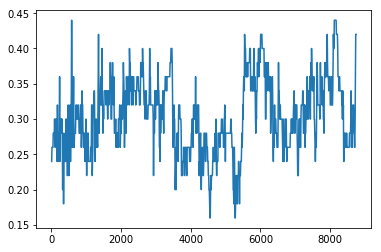

In [26]:
plt.plot(times[1:],acc_callback.testaccuracy)

In [27]:
model = ResnetBuilder.build_resnet_50((1000,1,22), 4)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
time_callback = TimeHistory()
acc_callback = AccuracyHistory()

In [29]:
model.fit(x1_train_add, y1_train_onehot,
              batch_size=32,
              epochs=100,shuffle=True,
          callbacks=[time_callback,acc_callback],
         validation_data=(x1_test_add, y1_test_onehot),verbose=1)
times = time_callback.times
loss,acc=model.evaluate(x1_test_add, y1_test_onehot, batch_size=32)
print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))

Train on 238 samples, validate on 50 samples
Epoch 1/100
238/238 [==============================] - 27s 113ms/step - loss: 6.4039 - acc: 0.2857 - val_loss: 12.5188 - val_acc: 0.2800
Epoch 2/100
238/238 [==============================] - 17s 72ms/step - loss: 5.8706 - acc: 0.5084 - val_loss: 10.3069 - val_acc: 0.1800
Epoch 3/100
238/238 [==============================] - 16s 67ms/step - loss: 4.8417 - acc: 0.6597 - val_loss: 8.4307 - val_acc: 0.2400
Epoch 4/100
238/238 [==============================] - 17s 70ms/step - loss: 4.3469 - acc: 0.8277 - val_loss: 7.5763 - val_acc: 0.2600
Epoch 5/100
238/238 [==============================] - 16s 69ms/step - loss: 4.0497 - acc: 0.8613 - val_loss: 6.8572 - val_acc: 0.2400
Epoch 6/100
238/238 [==============================] - 16s 69ms/step - loss: 3.8795 - acc: 0.9328 - val_loss: 7.3732 - val_acc: 0.2800
Epoch 7/100
238/238 [==============================] - 16s 68ms/step - loss: 3.7564 - acc: 0.9622 - val_loss: 7.2449 - val_acc: 0.2000
Epoch 8

Epoch 61/100
238/238 [==============================] - 16s 68ms/step - loss: 2.2225 - acc: 0.9832 - val_loss: 6.8868 - val_acc: 0.4600
Epoch 62/100
238/238 [==============================] - 16s 66ms/step - loss: 2.2089 - acc: 0.9832 - val_loss: 7.3439 - val_acc: 0.3800
Epoch 63/100
238/238 [==============================] - 16s 66ms/step - loss: 2.1574 - acc: 0.9916 - val_loss: 7.5413 - val_acc: 0.3400
Epoch 64/100
238/238 [==============================] - 16s 67ms/step - loss: 2.1515 - acc: 0.9958 - val_loss: 7.2237 - val_acc: 0.3600
Epoch 65/100
238/238 [==============================] - 16s 66ms/step - loss: 2.1168 - acc: 0.9916 - val_loss: 6.8618 - val_acc: 0.3600
Epoch 66/100
238/238 [==============================] - 18s 75ms/step - loss: 2.1257 - acc: 0.9832 - val_loss: 6.8662 - val_acc: 0.3200
Epoch 67/100
238/238 [==============================] - 17s 72ms/step - loss: 2.0686 - acc: 0.9916 - val_loss: 6.9265 - val_acc: 0.3600
Epoch 68/100
238/238 [==========================

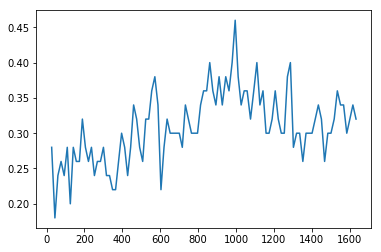

In [30]:
plt.plot(times[1:],acc_callback.testaccuracy)

# vgg16

In [136]:
from keras.layers import Conv1D, Conv2D, Conv3D, MaxPooling1D,MaxPooling2D, AveragePooling2D, Reshape
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
model = Sequential()

model.add(Dense(4, input_shape=(1000, 22, 1)))
model.add(Conv2D(64, (3, 3), activation='relu',kernel_initializer='uniform', padding='valid', name='block1_conv1'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='uniform',padding='same', name='block1_conv2'))
model.add(MaxPooling2D((3,1), strides=(2, 2), name='block1_pool'))

model.add(Conv2D(128, (3, 3), activation='relu',kernel_initializer='uniform', padding='same', name='block2_conv1'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='uniform',padding='same', name='block2_conv2'))
model.add(MaxPooling2D((3, 1), strides=(2, 2), name='block2_pool'))

model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='uniform',padding='same', name='block3_conv1'))
model.add(Conv2D(256, (3, 3), activation='relu',kernel_initializer='uniform', padding='same', name='block3_conv2'))
model.add(Conv2D(256, (3, 3), activation='relu',kernel_initializer='uniform', padding='same', name='block3_conv3'))
model.add(MaxPooling2D((3, 1), strides=(2, 2), name='block3_pool'))

model.add(Conv2D(512, (3, 3), activation='relu',kernel_initializer='uniform', padding='same', name='block4_conv1'))
model.add(Conv2D(512, (3, 3), activation='relu',kernel_initializer='uniform', padding='same', name='block4_conv2'))
model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='uniform',padding='same', name='block4_conv3'))
model.add(MaxPooling2D((3, 1), strides=(2, 2), name='block4_pool'))

model.add(Conv2D(512, (3, 3), activation='relu',kernel_initializer='uniform', padding='same', name='block5_conv1'))
model.add(Conv2D(512, (3, 3), activation='relu',kernel_initializer='uniform', padding='same', name='block5_conv2'))
model.add(Conv2D(512, (3, 3), activation='relu',kernel_initializer='uniform', padding='same', name='block5_conv3'))
model.add(MaxPooling2D((3, 1), strides=(2, 2), name='block5_pool'))
model.add(Flatten())  

model.add(Dense(4096,activation='relu'))  
model.add(Dropout(0.5))  
model.add(Dense(4096,activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(4096,activation='relu'))  
model.add(Dropout(0.5))  
model.add(Dense(4,activation='softmax'))  

# 991*22*25

# 22*25*991
#model.add(Conv2D(filters=976, kernel_size=(22,1), strides=1,activation='relu',padding='valid',kernel_regularizer = regularizers.l2(0.01),kernel_initializer='uniform'))
# 1*25*991
#model.add(Reshape((976,40,1), input_shape=(1,40,976)))
# 991*25*1
#model.add(AveragePooling2D(pool_size=(75,1),strides=(15,1)))


In [137]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
time_callback = TimeHistory()
acc_callback = AccuracyHistory()

In [138]:
model.fit(x1_train_add.transpose(0,3,2,1), y1_train_onehot,
              batch_size=32,
              epochs=10,shuffle=True,
          callbacks=[time_callback,acc_callback],
         validation_data=(x1_test_add.transpose(0,3,2,1), y1_test_onehot),verbose=1)
times = time_callback.times
loss,acc=model.evaluate(x1_test_add.transpose(0,3,2,1), y1_test_onehot, batch_size=32)
print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))

Train on 238 samples, validate on 50 samples
Epoch 1/10
238/238 [==============================] - 143s 601ms/step - loss: 11.1004 - acc: 0.2143 - val_loss: 11.9274 - val_acc: 0.2600
Epoch 2/10
238/238 [==============================] - 119s 500ms/step - loss: 12.1224 - acc: 0.2479 - val_loss: 11.9274 - val_acc: 0.2600
Epoch 3/10
238/238 [==============================] - 116s 488ms/step - loss: 12.1224 - acc: 0.2479 - val_loss: 11.9274 - val_acc: 0.2600
Epoch 4/10
238/238 [==============================] - 116s 489ms/step - loss: 12.1224 - acc: 0.2479 - val_loss: 11.9274 - val_acc: 0.2600
Epoch 5/10
238/238 [==============================] - 117s 492ms/step - loss: 12.1224 - acc: 0.2479 - val_loss: 11.9274 - val_acc: 0.2600
Epoch 6/10
238/238 [==============================] - 123s 516ms/step - loss: 12.1224 - acc: 0.2479 - val_loss: 11.9274 - val_acc: 0.2600
Epoch 7/10
238/238 [==============================] - 121s 508ms/step - loss: 12.1224 - acc: 0.2479 - val_loss: 11.9274 - val_a

KeyboardInterrupt: 

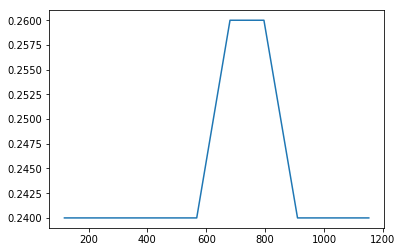

In [81]:
plt.plot(times[1:],acc_callback.testaccuracy)

In [87]:
x1_train_tr=x1_train.transpose(0,2,1)
x1_test_tr=x1_test.transpose(0,2,1)

In [109]:
model = Sequential()

#model.add(Dense(4, input_shape=x1_train_tr.shape[1:]))
model.add(Conv1D(64, 25, strides=4,kernel_initializer='uniform',activation='relu', padding='valid', input_shape=x1_train_tr.shape[1:], name='block1_conv1'))
model.add(Conv1D(64, 25, strides=1,activation='relu', kernel_initializer='uniform',padding='same', name='block1_conv2'))
model.add(MaxPooling1D(3, strides=2, name='block1_pool'))

model.add(Conv1D(128, 25, strides=1,activation='relu',kernel_initializer='uniform', padding='same', name='block2_conv1'))
model.add(Conv1D(128, 25, strides=1,activation='relu',kernel_initializer='uniform', padding='same', name='block2_conv2'))
model.add(MaxPooling1D(3, strides=2, name='block2_pool'))

model.add(Conv1D(256, 25, strides=1,activation='relu',kernel_initializer='uniform', padding='same', name='block3_conv1'))
model.add(Conv1D(256, 25, strides=1,activation='relu', kernel_initializer='uniform',padding='same', name='block3_conv2'))
model.add(Conv1D(256, 25, strides=1,activation='relu', kernel_initializer='uniform',padding='same', name='block3_conv3'))
model.add(MaxPooling1D(3, strides=2, name='block3_pool'))

model.add(Conv1D(512, 25,strides=1, activation='relu',kernel_initializer='uniform', padding='same', name='block4_conv1'))
model.add(Conv1D(512, 25, strides=1,activation='relu', kernel_initializer='uniform',padding='same', name='block4_conv2'))
model.add(Conv1D(512, 25, strides=1,activation='relu',kernel_initializer='uniform', padding='same', name='block4_conv3'))
model.add(MaxPooling1D(3, strides=2, name='block4_pool'))

model.add(Conv1D(512, 25, strides=1,activation='relu',kernel_initializer='uniform', padding='same', name='block5_conv1'))
model.add(Conv1D(512, 25, strides=1,activation='relu',kernel_initializer='uniform', padding='same', name='block5_conv2'))
model.add(Conv1D(512, 25, strides=1,activation='relu',kernel_initializer='uniform', padding='same', name='block5_conv3'))
model.add(MaxPooling1D(3, strides=2, name='block5_pool'))
model.add(Flatten())  

model.add(Dense(4096,activation='relu'))  
model.add(Dropout(0.5))  
model.add(Dense(4096,activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(4096,activation='relu'))  
model.add(Dropout(0.5))  
model.add(Dense(4,activation='softmax'))  

#model.add(Dense(4096,activation='relu'))  
#model.add(Dropout(0.5)) 


In [110]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
time_callback = TimeHistory()
acc_callback = AccuracyHistory()

In [111]:
model.fit(x1_train_tr, y1_train_onehot,
              batch_size=80,
              epochs=30,shuffle=True,
          callbacks=[time_callback,acc_callback],
         validation_data=(x1_test_tr, y1_test_onehot),verbose=1)
times = time_callback.times
loss,acc=model.evaluate(x1_test_tr, y1_test_onehot, batch_size=32)
print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))

Train on 238 samples, validate on 50 samples
Epoch 1/30
238/238 [==============================] - 42s 176ms/step - loss: 12.5965 - acc: 0.2185 - val_loss: 11.4677 - val_acc: 0.2800
Epoch 2/30
238/238 [==============================] - 36s 153ms/step - loss: 12.5292 - acc: 0.2227 - val_loss: 12.2498 - val_acc: 0.2400
Epoch 3/30
238/238 [==============================] - 36s 152ms/step - loss: 12.0547 - acc: 0.2521 - val_loss: 12.2498 - val_acc: 0.2400
Epoch 4/30
238/238 [==============================] - 36s 153ms/step - loss: 12.0547 - acc: 0.2521 - val_loss: 12.2498 - val_acc: 0.2400
Epoch 5/30
238/238 [==============================] - 36s 153ms/step - loss: 12.0547 - acc: 0.2521 - val_loss: 12.2498 - val_acc: 0.2400
Epoch 6/30
238/238 [==============================] - 37s 154ms/step - loss: 12.0547 - acc: 0.2521 - val_loss: 12.2498 - val_acc: 0.2400
Epoch 7/30
238/238 [==============================] - 37s 155ms/step - loss: 12.0547 - acc: 0.2521 - val_loss: 12.2498 - val_acc: 0.2

KeyboardInterrupt: 

# Subject2

In [36]:
from keras.optimizers import SGD
opt = keras.optimizers.SGD(lr=0.01, momentum=0.9, decay=0.0005, nesterov=False)
model2 = ResnetBuilder.build_resnet_18((1000,1,22), 4)
model2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
time_callback = TimeHistory()
acc_callback = AccuracyHistory()

In [39]:
model2.fit(x2_train_add, y2_train_onehot,
              batch_size=32,
              epochs=100,shuffle=True,
          callbacks=[time_callback,acc_callback],
         validation_data=(x2_test_add, y2_test_onehot),verbose=1)
times = time_callback.times
loss,acc=model.evaluate(x2_test_add, y2_test_onehot, batch_size=32)
print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))

Train on 238 samples, validate on 50 samples
Epoch 1/100
238/238 [==============================] - 8s 34ms/step - loss: 0.7391 - acc: 1.0000 - val_loss: 5.4733 - val_acc: 0.1200
Epoch 2/100
238/238 [==============================] - 8s 34ms/step - loss: 0.7348 - acc: 1.0000 - val_loss: 5.5225 - val_acc: 0.1200
Epoch 3/100
238/238 [==============================] - 8s 33ms/step - loss: 0.7424 - acc: 0.9958 - val_loss: 5.5829 - val_acc: 0.1200
Epoch 4/100
238/238 [==============================] - 8s 33ms/step - loss: 0.7336 - acc: 1.0000 - val_loss: 5.5814 - val_acc: 0.1200
Epoch 5/100
238/238 [==============================] - 8s 33ms/step - loss: 0.7324 - acc: 1.0000 - val_loss: 5.5596 - val_acc: 0.1400
Epoch 6/100
238/238 [==============================] - 8s 35ms/step - loss: 0.7336 - acc: 1.0000 - val_loss: 5.5520 - val_acc: 0.1400
Epoch 7/100
238/238 [==============================] - 8s 33ms/step - loss: 0.7325 - acc: 1.0000 - val_loss: 5.5543 - val_acc: 0.1400
Epoch 8/100
238/2

238/238 [==============================] - 9s 36ms/step - loss: 0.7231 - acc: 1.0000 - val_loss: 5.2184 - val_acc: 0.1800
Epoch 62/100
238/238 [==============================] - 8s 34ms/step - loss: 0.7230 - acc: 1.0000 - val_loss: 5.2266 - val_acc: 0.1800
Epoch 63/100
238/238 [==============================] - 8s 36ms/step - loss: 0.7229 - acc: 1.0000 - val_loss: 5.2243 - val_acc: 0.1800
Epoch 64/100
238/238 [==============================] - 9s 37ms/step - loss: 0.7225 - acc: 1.0000 - val_loss: 5.2292 - val_acc: 0.1800
Epoch 65/100
238/238 [==============================] - 9s 36ms/step - loss: 0.7223 - acc: 1.0000 - val_loss: 5.2297 - val_acc: 0.1800
Epoch 66/100
238/238 [==============================] - 9s 37ms/step - loss: 0.7221 - acc: 1.0000 - val_loss: 5.2345 - val_acc: 0.1800
Epoch 67/100
238/238 [==============================] - 9s 36ms/step - loss: 0.7224 - acc: 1.0000 - val_loss: 5.2435 - val_acc: 0.1800
Epoch 68/100
238/238 [==============================] - 8s 34ms/step

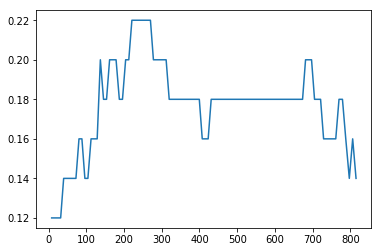

In [40]:
plt.plot(times[1:],acc_callback.testaccuracy)

In [41]:
model2 = ResnetBuilder.build_resnet_18((1000,1,22), 4)
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
time_callback = TimeHistory()
acc_callback = AccuracyHistory()

In [42]:
model2.fit(x2_train_add, y2_train_onehot,
              batch_size=32,
              epochs=100,shuffle=True,
          callbacks=[time_callback,acc_callback],
         validation_data=(x2_test_add, y2_test_onehot),verbose=1)
times = time_callback.times
loss,acc=model.evaluate(x2_test_add, y2_test_onehot, batch_size=32)
print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))

Train on 238 samples, validate on 50 samples
Epoch 1/100
238/238 [==============================] - 15s 63ms/step - loss: 2.3887 - acc: 0.2395 - val_loss: 3.7686 - val_acc: 0.3000
Epoch 2/100
238/238 [==============================] - 9s 36ms/step - loss: 1.4835 - acc: 0.6681 - val_loss: 3.2511 - val_acc: 0.3000
Epoch 3/100
238/238 [==============================] - 9s 37ms/step - loss: 0.7986 - acc: 0.8950 - val_loss: 3.2865 - val_acc: 0.2200
Epoch 4/100
238/238 [==============================] - 9s 36ms/step - loss: 0.5938 - acc: 0.9496 - val_loss: 3.2910 - val_acc: 0.2600
Epoch 5/100
238/238 [==============================] - 9s 37ms/step - loss: 0.4350 - acc: 0.9832 - val_loss: 3.0832 - val_acc: 0.3000
Epoch 6/100
238/238 [==============================] - 9s 36ms/step - loss: 0.3968 - acc: 0.9832 - val_loss: 3.1551 - val_acc: 0.2000
Epoch 7/100
238/238 [==============================] - 9s 37ms/step - loss: 0.3297 - acc: 1.0000 - val_loss: 3.3896 - val_acc: 0.2000
Epoch 8/100
238/

238/238 [==============================] - 9s 40ms/step - loss: 0.2778 - acc: 0.9916 - val_loss: 4.7380 - val_acc: 0.2200
Epoch 62/100
238/238 [==============================] - 9s 37ms/step - loss: 0.2642 - acc: 1.0000 - val_loss: 4.7422 - val_acc: 0.2400
Epoch 63/100
238/238 [==============================] - 9s 36ms/step - loss: 0.2593 - acc: 1.0000 - val_loss: 4.7980 - val_acc: 0.2400
Epoch 64/100
238/238 [==============================] - 9s 38ms/step - loss: 0.2574 - acc: 1.0000 - val_loss: 4.8955 - val_acc: 0.2400
Epoch 65/100
238/238 [==============================] - 9s 39ms/step - loss: 0.3013 - acc: 0.9874 - val_loss: 4.9485 - val_acc: 0.2200
Epoch 66/100
238/238 [==============================] - 9s 39ms/step - loss: 0.3168 - acc: 0.9790 - val_loss: 5.3086 - val_acc: 0.2400
Epoch 67/100
238/238 [==============================] - 9s 39ms/step - loss: 0.4321 - acc: 0.9328 - val_loss: 5.3808 - val_acc: 0.2200
Epoch 68/100
238/238 [==============================] - 9s 39ms/step

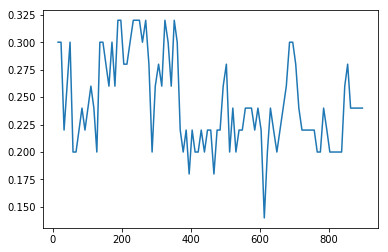

In [43]:
plt.plot(times[1:],acc_callback.testaccuracy)

In [48]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 1000, 22, 64)      640       
Total params: 640
Trainable params: 640
Non-trainable params: 0
_________________________________________________________________


# subject 3

In [148]:
model4 = ResnetBuilder.build_resnet_18((1000,1,22), 4)
model4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
time_callback = TimeHistory()
acc_callback = AccuracyHistory()
model4.fit(x3_train_add, y3_train_onehot,
              batch_size=32,
              epochs=100,shuffle=True,
          callbacks=[time_callback,acc_callback],
         validation_data=(x3_test_add, y3_test_onehot),verbose=1)
times = time_callback.times


Train on 238 samples, validate on 50 samples
Epoch 1/100
238/238 [==============================] - 35s 148ms/step - loss: 2.4949 - acc: 0.2941 - val_loss: 3.5059 - val_acc: 0.2400
Epoch 2/100
238/238 [==============================] - 9s 38ms/step - loss: 1.4520 - acc: 0.6303 - val_loss: 3.4618 - val_acc: 0.3000
Epoch 3/100
238/238 [==============================] - 9s 39ms/step - loss: 0.8912 - acc: 0.8613 - val_loss: 3.3949 - val_acc: 0.2000
Epoch 4/100
238/238 [==============================] - 9s 39ms/step - loss: 0.5179 - acc: 0.9664 - val_loss: 3.4300 - val_acc: 0.2400
Epoch 5/100
238/238 [==============================] - 9s 39ms/step - loss: 0.4016 - acc: 0.9916 - val_loss: 3.4987 - val_acc: 0.2400
Epoch 6/100
238/238 [==============================] - 9s 39ms/step - loss: 0.3460 - acc: 1.0000 - val_loss: 3.6248 - val_acc: 0.2200
Epoch 7/100
238/238 [==============================] - 10s 43ms/step - loss: 0.3254 - acc: 1.0000 - val_loss: 3.6983 - val_acc: 0.2200
Epoch 8/100
23

238/238 [==============================] - 9s 39ms/step - loss: 0.2624 - acc: 1.0000 - val_loss: 5.0558 - val_acc: 0.3400
Epoch 62/100
238/238 [==============================] - 9s 40ms/step - loss: 0.2656 - acc: 0.9916 - val_loss: 4.9494 - val_acc: 0.3400
Epoch 63/100
238/238 [==============================] - 9s 39ms/step - loss: 0.2906 - acc: 0.9874 - val_loss: 4.9729 - val_acc: 0.3200
Epoch 64/100
238/238 [==============================] - 10s 41ms/step - loss: 0.2631 - acc: 0.9958 - val_loss: 5.0854 - val_acc: 0.2600
Epoch 65/100
238/238 [==============================] - 9s 39ms/step - loss: 0.2707 - acc: 0.9958 - val_loss: 5.0494 - val_acc: 0.2600
Epoch 66/100
238/238 [==============================] - 9s 39ms/step - loss: 0.2500 - acc: 1.0000 - val_loss: 5.0502 - val_acc: 0.2600
Epoch 67/100
238/238 [==============================] - 9s 39ms/step - loss: 0.2662 - acc: 0.9916 - val_loss: 4.9762 - val_acc: 0.2600
Epoch 68/100
238/238 [==============================] - 9s 39ms/ste

ValueError: Error when checking input: expected dense_44_input to have shape (1000, 22, 1) but got array with shape (1, 22, 1000)

50/50 [==============================] - 0s 4ms/step

Testing loss: 5.212983570098877, acc: 0.12000000014901162



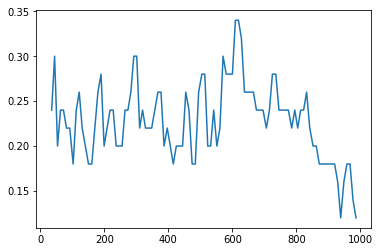

In [149]:
loss,acc=model4.evaluate(x3_test_add, y3_test_onehot, batch_size=32)
print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))
plt.plot(times[1:],acc_callback.testaccuracy)

# Total subject

In [113]:
model3 = ResnetBuilder.build_resnet_18((1000,1,22), 4)
model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
time_callback = TimeHistory()
acc_callback = AccuracyHistory()

In [121]:
model3.fit(x_train_add, y_train_onehot,
              batch_size=32,
              epochs=100,shuffle=True,
          callbacks=[time_callback,acc_callback],
         validation_data=(x_test_add, y_test_onehot),verbose=1)
times = time_callback.times


Train on 2142 samples, validate on 638 samples
Epoch 1/100
2142/2142 [==============================] - 76s 35ms/step - loss: 1.8656 - acc: 0.3025 - val_loss: 2.4264 - val_acc: 0.3495
Epoch 2/100
2142/2142 [==============================] - 75s 35ms/step - loss: 1.5135 - acc: 0.4650 - val_loss: 1.6865 - val_acc: 0.4404
Epoch 3/100
2142/2142 [==============================] - 79s 37ms/step - loss: 1.3066 - acc: 0.5747 - val_loss: 1.8232 - val_acc: 0.4451
Epoch 4/100
2142/2142 [==============================] - 77s 36ms/step - loss: 1.0914 - acc: 0.6793 - val_loss: 1.8161 - val_acc: 0.4937
Epoch 5/100
2142/2142 [==============================] - 81s 38ms/step - loss: 0.9394 - acc: 0.7432 - val_loss: 1.7667 - val_acc: 0.5361
Epoch 6/100
2142/2142 [==============================] - 80s 37ms/step - loss: 0.7660 - acc: 0.8165 - val_loss: 2.0966 - val_acc: 0.5580
Epoch 7/100
2142/2142 [==============================] - 81s 38ms/step - loss: 0.6306 - acc: 0.8730 - val_loss: 1.9482 - val_acc: 0

2142/2142 [==============================] - 78s 37ms/step - loss: 0.1964 - acc: 0.9916 - val_loss: 2.0822 - val_acc: 0.6223
Epoch 61/100
2142/2142 [==============================] - 78s 36ms/step - loss: 0.1785 - acc: 0.9935 - val_loss: 2.0840 - val_acc: 0.6332
Epoch 62/100
2142/2142 [==============================] - 79s 37ms/step - loss: 0.1808 - acc: 0.9930 - val_loss: 2.1101 - val_acc: 0.6191
Epoch 63/100
2142/2142 [==============================] - 77s 36ms/step - loss: 0.2115 - acc: 0.9827 - val_loss: 2.3740 - val_acc: 0.6160
Epoch 64/100
2142/2142 [==============================] - 76s 36ms/step - loss: 0.2218 - acc: 0.9762 - val_loss: 2.4305 - val_acc: 0.6254
Epoch 65/100
2142/2142 [==============================] - 79s 37ms/step - loss: 0.2155 - acc: 0.9841 - val_loss: 2.1581 - val_acc: 0.6254
Epoch 66/100
2142/2142 [==============================] - 79s 37ms/step - loss: 0.1994 - acc: 0.9874 - val_loss: 1.9471 - val_acc: 0.6270
Epoch 67/100
2142/2142 [=======================

RuntimeError: The model needs to be compiled before being used.

638/638 [==============================] - 2s 2ms/step

Testing loss: 2.048684146337001, acc: 0.6206896553125502



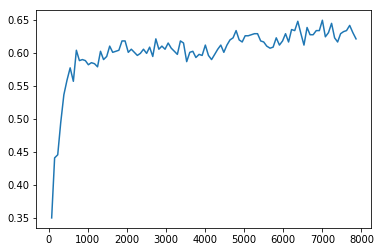

In [122]:
loss,acc=model3.evaluate(x_test_add, y_test_onehot, batch_size=32)
print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))
plt.plot(times[1:],acc_callback.testaccuracy)

# Using overall model to predict subject1

In [124]:
loss,acc=model3.evaluate(x1_test_add, y1_test_onehot, batch_size=32)
print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))

50/50 [==============================] - 0s 3ms/step

Testing loss: 2.4396323204040526, acc: 0.4999999976158142



In [139]:
loss,acc=model3.evaluate(x2_test_add, y2_test_onehot, batch_size=32)
print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))

50/50 [==============================] - 0s 5ms/step

Testing loss: 3.130914316177368, acc: 0.3800000011920929



In [140]:
loss,acc=model3.evaluate(x3_test_add, y3_test_onehot, batch_size=32)
print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))

50/50 [==============================] - 0s 4ms/step

Testing loss: 3.464840221405029, acc: 0.3600000047683716



In [141]:
loss,acc=model3.evaluate(x4_test_add, y4_test_onehot, batch_size=32)
print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))

50/50 [==============================] - 0s 4ms/step

Testing loss: 3.9916942596435545, acc: 0.30000000178813935



In [143]:
loss,acc=model3.evaluate(x5_test_add, y5_test_onehot, batch_size=32)
print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))

50/50 [==============================] - 0s 4ms/step

Testing loss: 2.310154371261597, acc: 0.44000000119209287



In [144]:
loss,acc=model3.evaluate(x6_test_add, y6_test_onehot, batch_size=32)
print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))

50/50 [==============================] - 0s 4ms/step

Testing loss: 3.218543071746826, acc: 0.3600000047683716



In [145]:
loss,acc=model3.evaluate(x7_test_add, y7_test_onehot, batch_size=32)
print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))

50/50 [==============================] - 0s 4ms/step

Testing loss: 3.320403060913086, acc: 0.4600000011920929



In [146]:
loss,acc=model3.evaluate(x8_test_add, y8_test_onehot, batch_size=32)
print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))

50/50 [==============================] - 0s 4ms/step

Testing loss: 3.083814792633057, acc: 0.4200000023841858



In [147]:
loss,acc=model3.evaluate(x9_test_add, y9_test_onehot, batch_size=32)
print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))

50/50 [==============================] - 0s 4ms/step

Testing loss: 3.4238881206512453, acc: 0.34000000476837156

